# August 29th, 2018
## Benjamin Adam Catching
## Polio-virus DIPs Project
## Andino Lab

The droplet images by themselves do not have sufficient information in the distribution of pixel intensities; the distribution of pixel intensities is not sufficiently useful to separate droplets containing cells from those that do not contain cells.  

Maybe a transform of the image that makes use of the halo that is typically surrounding the cell would be of use. The goal is to have an accurate perimeter that envelopes the cell image. 

In [1]:
# Import the important packages
import glob
import numpy as np
import matplotlib.pyplot as plt
import skimage.io
import seaborn as sns
import skimage
import scipy
import pandas as pd
import os
import sys

In [2]:
# Define the location of the files
bulk_cell_dir = '../../data/07.27_HeLa_TIP_Hong/'

# Define the six directories that contain image files
set_1 = '#1/10x-[0-9].tif'
set_2 = '#2/10x-[0-9].tif'
set_3 = '#3/10x-[0-9].tif'

In [3]:
# Read in the files
group_1 = sorted(glob.glob(bulk_cell_dir + set_1))
group_2 = sorted(glob.glob(bulk_cell_dir + set_2))
group_3 = sorted(glob.glob(bulk_cell_dir + set_3))

In [4]:
# Import the processing script
import microfluidics_analysis as ma

In [5]:
group_1_bright, group_1_gfp = ma.droplet_save(group_1)
group_2_bright, group_2_gfp = ma.droplet_save(group_2)
group_3_bright, group_3_gfp = ma.droplet_save(group_3)

print(len(group_1_bright))
print(len(group_2_bright))
print(len(group_3_bright))

477
413
407


In [8]:
# Bring the previously determined droplets with cells values from yesterday
group_1_cell_numbers = np.array([4, 9, 10, 11, 24, 37, 38, 43, 45, 47, 49, 57, 72, 75, 86, 99, 
                                 111, 116, 117, 128, 135, 139, 145, 152, 155, 161, 167, 171, 174, 
                                 175, 182, 184, 187, 203, 204, 212, 226, 231, 235, 236, 240, 266, 
                                 269, 270, 272, 277, 282, 286, 292, 294, 296, 301, 305, 306, 323, 
                                 325, 326, 332, 342, 345, 350, 351, 352, 356, 371, 385, 403, 404, 
                                 421, 427, 429, 432, 437, 441, 446, 447, 450, 461, 462, 473])

group_2_cell_numbers = np.array([0, 6, 20, 21, 32, 40, 44, 47, 50, 64, 67, 70, 75, 77, 98, 
                                 109, 118, 123, 133, 134, 138, 145, 149, 150, 152, 156, 159,
                                 162, 163, 165, 167, 170, 178, 191, 203, 207, 209, 210, 214,
                                 215, 225, 228, 229, 230, 233, 245, 246, 248, 250, 254, 264, 
                                 271, 291, 299, 305, 312, 331, 333, 335, 339, 340, 343, 354,
                                 357, 359, 365, 375, 376, 388, 390, 393, 395, 411])
group_3_cell_numbers = np.array([2, 4, 10, 11, 17, 21, 22, 26, 28, 40, 44, 49, 52, 53, 55, 62, 65,
                                 67, 71, 78, 84, 86, 87, 90, 91, 98, 100, 101, 103, 104, 107, 108,
                                 109, 115, 116, 119, 121, 130, 131, 132, 133, 152, 157, 160, 170, 
                                 171, 175, 176, 177, 185, 187, 197, 204, 205, 207, 208, 210, 213, 
                                 214, 215, 216, 217, 221, 226, 233, 235, 238, 246, 253, 256, 265, 
                                 266, 272, 278, 280, 285, 286, 287, 288, 292, 297, 302, 310, 311, 
                                 312, 314, 318, 319, 322, 325, 333, 334, 341, 344, 346, 353, 354, 
                                 357, 366, 372, 376, 380, 395, 402, 403, 404, 406])

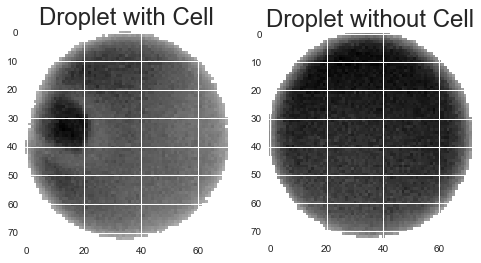

In [23]:
# Look at a single droplet
drop_with_cell = group_1_bright[group_1_cell_numbers[3]]
drop_without_cell = group_1_bright[0]
fig, ax = plt.subplots(1, 2)
ax[0].imshow(drop_with_cell)
ax[0].set_title('Droplet with Cell', size=24)
ax[1].imshow(drop_without_cell)
ax[1].set_title('Droplet without Cell', size=24)
plt.show()

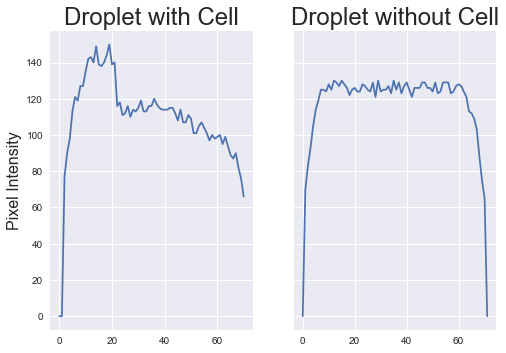

In [24]:
# Show the values of the cross-section of the droplet
fig, ax = plt.subplots(1, 2, sharey=True)
ax[0].plot(drop_with_cell[30])
ax[0].set_title('Droplet with Cell', size=24)
ax[0].set_ylabel('Pixel Intensity', size=16)
ax[1].plot(drop_without_cell[25])
ax[1].set_title('Droplet without Cell', size=24)
plt.show()

This suggests that the cell is considerably brighter than the surrounding that is part of the droplet.

In [29]:
# Find the non-zero mean value of the droplet
def find_mean_std(image):
    """
    From the 2-D 8-bit image, find the non-zero values and 
    return the mean and standard deviation.
    """
    
    # Flatten the image
    flatten_image = image.flatten()
    # Only include non-zeros
    non_zero_image = np.array([x for x in flatten_image if x != 0])
    # Return the mean and standard deviation
    
    return non_zero_image.mean(), non_zero_image.std()

In [31]:
# Mean values of the two test droplets
drop_with_cell_mean, drop_with_cell_std = find_mean_std(drop_with_cell)
drop_without_cell_mean, drop_without_cell_std = find_mean_std(drop_without_cell)

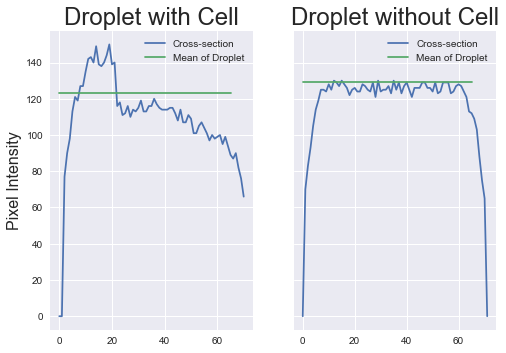

In [32]:
# Show the values of the cross-section of the droplet
fig, ax = plt.subplots(1, 2, sharey=True)
ax[0].plot(drop_with_cell[30], label='Cross-section')
ax[0].plot([0, 65], [drop_with_cell_mean+drop_with_cell_std]*2, label='Mean of Droplet')
ax[0].legend()
ax[0].set_title('Droplet with Cell', size=24)
ax[0].set_ylabel('Pixel Intensity', size=16)

ax[1].plot(drop_without_cell[25], label='Cross-section')
ax[1].plot([0, 65], [drop_without_cell_mean+drop_without_cell_std]*2, label='Mean of Droplet')
ax[1].legend()
ax[1].set_title('Droplet without Cell', size=24)
plt.show()